# **Time Domain EEG Feature**

## 0. Start

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

## 1.Load Data

In [ ]:
df_time=pd.read_csv("/content/drive/MyDrive/MLMA Project/BS-HMS-Dataset/time_domain_features")

In [ ]:
# Drop participant 20, 21 ,27 that contains NA
rows_to_drop = ['Test20', 'Test21', 'Test27']
df_time_filtered = df_time[~df_time['Test'].str.contains('|'.join(rows_to_drop))]
df_time_filtered

,Unnamed: 0,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,...,AF4_max,AF4_activity,AF4_mobility,AF4_complexity,AF4_ar_coeff_0,AF4_ar_coeff_1,AF4_ar_coeff_2,AF4_ar_coeff_3,AF4_ar_coeff_4,Test
0,0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,...,4798.461426,1955.207164,0.201175,5.853881,1.888919,-1.916397,1.774889,-1.162047,0.414635,EEG_Test0_1
1,1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,...,5405.641113,4047.042955,0.181730,6.655339,1.869903,-1.917447,1.803922,-1.177878,0.421499,EEG_Test0_2
2,2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,...,4456.922852,788.581256,0.362081,3.528739,1.719312,-1.716449,1.651069,-1.060818,0.406884,EEG_Test0_3
3,3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,...,7725.640625,30770.363380,0.065568,16.047249,2.014694,-1.962541,1.826205,-1.251982,0.373620,EEG_Test0_4
4,4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,...,5711.794922,9459.787110,0.097349,11.212047,1.916121,-1.784461,1.639423,-1.070856,0.299771,EEG_Test0_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,...,4534.358887,1341.930166,0.288382,4.671318,1.619370,-1.575834,1.591902,-1.013965,0.378527,EEG_Test26_4
212,212,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,...,4649.230469,2125.336360,0.194158,6.114867,1.799081,-1.684543,1.536058,-0.908229,0.257632,EEG_Test26_5
213,213,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,...,5397.948730,4823.841089,0.127178,9.549253,1.850852,-1.822298,1.738571,-1.141967,0.374842,EEG_Test26_6
214,214,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,...,4794.358887,1804.680486,0.212828,5.879350,1.683692,-1.604122,1.484709,-0.874587,0.310306,EEG_Test26_7


In [ ]:
# Load mega data
metadata=pd.read_excel("/content/drive/MyDrive/MLMA Project/BS-HMS-Dataset/Emotiv-based-Data/Demographic Details of Participants.xlsx")
metadata.columns=[
    "User ID", "Age", "Gender", "Dominant Hand", "Date / Time",
    "Video ID 1", "Video ID 2", "Date / Time", "Video ID 3", "Video ID 4"]
metadata

,User ID,Age,Gender,Dominant Hand,Date / Time,Video ID 1,Video ID 2,Date / Time,Video ID 3,Video ID 4
0,Test0,27,Male,Right,08/18/2019/2:00:00 PM,15,8,08/23/2019/3:40:00 PM,2.0,11.0
1,Test1,24,Male,Right,08/18/2019/3:20:00 PM,5,5,08/22/2019/4:30:00 PM,9.0,5.0
2,test2,30,Female,Right,08/19/2019/4:20:00 PM,8,11,08/20/2019/4:40:00 PM,5.0,2.0
3,test3,25,Male,Right,08/20/2019/1:28:00 PM,14,7,08/28/2019/3:15:00 PM,15.0,1.0
4,test4,24,Male,Left,08/21/2019/3:20:00 PM,12,6,08/30/2019/5:10:00 PM,15.0,19.0
5,test5,27,Male,Right,08/22/2019/3:15:00 PM,5,15,09/13/2019/4:25:00 PM,1.0,19.0
6,test6,25,Male,Right,08/23/2019/1:55:00 PM,9,12,09/04/2019/4:50:00 PM,12.0,9.0
7,test7,27,Female,Right,08/23/2019/2:50:00 PM,1,14,09/04/2019/5:30:00 PM,10.0,8.0
8,test8,24,Female,Right,08/25/2019/12:50:00 PM,7,12,09.25/2019/4:45:00 PM,1.0,10.0
9,test9,20,Male,Right,08/28/2019/2:00:00 PM,9,11,09/04/2019/6:50:00 PM,11.0,16.0


In [ ]:
# Drop na rows and show only video ids
metadata_video_id=metadata[["User ID","Video ID 1", "Video ID 2", "Video ID 3", "Video ID 4"]]
metadata_video_id=metadata_video_id.dropna()
metadata_video_id

,User ID,Video ID 1,Video ID 2,Video ID 3,Video ID 4
0,Test0,15,8,2.0,11.0
1,Test1,5,5,9.0,5.0
2,test2,8,11,5.0,2.0
3,test3,14,7,15.0,1.0
4,test4,12,6,15.0,19.0
5,test5,5,15,1.0,19.0
6,test6,9,12,12.0,9.0
7,test7,1,14,10.0,8.0
8,test8,7,12,1.0,10.0
9,test9,9,11,11.0,16.0


In [ ]:
# Add Emotion column
metadata_video_id_list = metadata_video_id.drop('User ID', axis=1).values.flatten().tolist()
metadata_video_id_list = [int(item) for item in metadata_video_id_list for _ in range(2)] #to int and double the time
metadata_video_id_list = [1 if item in [1,2,5,6,13,14,15,16,17,18] else 0 for item in metadata_video_id_list] #map
df_time_filtered["Emotion"]=metadata_video_id_list

<ipython-input-7-00e5abdab353>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_filtered["Emotion"]=metadata_video_id_list


In [ ]:
# Drop "Unnamed: 0","Test" columns
df_time_filtered=df_time_filtered.drop(columns=["Unnamed: 0","Test"])
df_time_filtered

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,AF4_max,AF4_activity,AF4_mobility,AF4_complexity,AF4_ar_coeff_0,AF4_ar_coeff_1,AF4_ar_coeff_2,AF4_ar_coeff_3,AF4_ar_coeff_4,Emotion
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,4798.461426,1955.207164,0.201175,5.853881,1.888919,-1.916397,1.774889,-1.162047,0.414635,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,5405.641113,4047.042955,0.181730,6.655339,1.869903,-1.917447,1.803922,-1.177878,0.421499,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,4456.922852,788.581256,0.362081,3.528739,1.719312,-1.716449,1.651069,-1.060818,0.406884,0
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,7725.640625,30770.363380,0.065568,16.047249,2.014694,-1.962541,1.826205,-1.251982,0.373620,0
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,5711.794922,9459.787110,0.097349,11.212047,1.916121,-1.784461,1.639423,-1.070856,0.299771,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,4534.358887,1341.930166,0.288382,4.671318,1.619370,-1.575834,1.591902,-1.013965,0.378527,1
212,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,4649.230469,2125.336360,0.194158,6.114867,1.799081,-1.684543,1.536058,-0.908229,0.257632,0
213,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,5397.948730,4823.841089,0.127178,9.549253,1.850852,-1.822298,1.738571,-1.141967,0.374842,0
214,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,4794.358887,1804.680486,0.212828,5.879350,1.683692,-1.604122,1.484709,-0.874587,0.310306,1


## 2. Train Test Split

In [ ]:
# Assign ID for each participant
folder = [num for num in range(1, 26) for _ in range(8)]
df_time_filtered["Folder"]=folder
df_time_filtered

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,AF4_activity,AF4_mobility,AF4_complexity,AF4_ar_coeff_0,AF4_ar_coeff_1,AF4_ar_coeff_2,AF4_ar_coeff_3,AF4_ar_coeff_4,Emotion,Folder
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,1955.207164,0.201175,5.853881,1.888919,-1.916397,1.774889,-1.162047,0.414635,1,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,4047.042955,0.181730,6.655339,1.869903,-1.917447,1.803922,-1.177878,0.421499,1,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,788.581256,0.362081,3.528739,1.719312,-1.716449,1.651069,-1.060818,0.406884,0,1
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,30770.363380,0.065568,16.047249,2.014694,-1.962541,1.826205,-1.251982,0.373620,0,1
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,9459.787110,0.097349,11.212047,1.916121,-1.784461,1.639423,-1.070856,0.299771,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,1341.930166,0.288382,4.671318,1.619370,-1.575834,1.591902,-1.013965,0.378527,1,25
212,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,2125.336360,0.194158,6.114867,1.799081,-1.684543,1.536058,-0.908229,0.257632,0,25
213,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,4823.841089,0.127178,9.549253,1.850852,-1.822298,1.738571,-1.141967,0.374842,0,25
214,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,1804.680486,0.212828,5.879350,1.683692,-1.604122,1.484709,-0.874587,0.310306,1,25


In [ ]:
# to make sure the same fold is use as train and test for different model
import random
folder_names = [i for i in range(1, 26)]

# Shuffle the folder names to ensure random distribution
random.shuffle(folder_names)

# Calculate the indices for the 80-20 split
train_split = int(0.8 * len(folder_names))

# Split the folders into training and testing sets
train_folders = folder_names[:train_split]
test_folders = folder_names[train_split:]

print(train_folders)
print(test_folders)

[14, 23, 5, 24, 10, 15, 16, 8, 1, 4, 11, 18, 3, 2, 21, 19, 17, 13, 12, 25]
[9, 7, 6, 22, 20]


In [ ]:
train_time = df_time_filtered[df_time_filtered['Folder'].isin(train_folders)]
X_train_time =train_time.iloc[:,:-2]
y_train_time=train_time.iloc[:,-2]

test_time = df_time_filtered[df_time_filtered['Folder'].isin(test_folders)]
X_test_time =test_time.iloc[:,:-2]
y_test_time=test_time.iloc[:,-2]

In [ ]:
train_time

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,AF4_activity,AF4_mobility,AF4_complexity,AF4_ar_coeff_0,AF4_ar_coeff_1,AF4_ar_coeff_2,AF4_ar_coeff_3,AF4_ar_coeff_4,Emotion,Folder
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,1955.207164,0.201175,5.853881,1.888919,-1.916397,1.774889,-1.162047,0.414635,1,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,4047.042955,0.181730,6.655339,1.869903,-1.917447,1.803922,-1.177878,0.421499,1,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,788.581256,0.362081,3.528739,1.719312,-1.716449,1.651069,-1.060818,0.406884,0,1
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,30770.363380,0.065568,16.047249,2.014694,-1.962541,1.826205,-1.251982,0.373620,0,1
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,9459.787110,0.097349,11.212047,1.916121,-1.784461,1.639423,-1.070856,0.299771,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,1341.930166,0.288382,4.671318,1.619370,-1.575834,1.591902,-1.013965,0.378527,1,25
212,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,2125.336360,0.194158,6.114867,1.799081,-1.684543,1.536058,-0.908229,0.257632,0,25
213,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,4823.841089,0.127178,9.549253,1.850852,-1.822298,1.738571,-1.141967,0.374842,0,25
214,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,1804.680486,0.212828,5.879350,1.683692,-1.604122,1.484709,-0.874587,0.310306,1,25


In [ ]:
test_time

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,AF4_activity,AF4_mobility,AF4_complexity,AF4_ar_coeff_0,AF4_ar_coeff_1,AF4_ar_coeff_2,AF4_ar_coeff_3,AF4_ar_coeff_4,Emotion,Folder
40,4231.692979,19.037909,362.441991,4230.769043,3721.538330,4485.127930,362.441991,0.251568,5.052659,1.604238,...,557.468734,0.223801,5.631718,1.602273,-1.372355,1.296663,-0.799989,0.273407,1,6
41,4234.023106,25.403086,645.316793,4233.333008,4060.512695,4363.076660,645.316793,0.211628,6.028663,1.697812,...,1008.860445,0.193565,6.349196,1.783381,-1.692951,1.624123,-1.091121,0.376566,1,6
42,4235.783178,11.762272,138.351034,4234.358887,4144.102539,4347.179199,138.351034,0.484638,2.808645,1.482581,...,229.907067,0.402753,3.330742,1.530041,-1.469139,1.455597,-0.904197,0.387698,1,6
43,4236.687864,19.370985,375.235052,4236.410156,4100.512695,4406.666504,375.235052,0.273290,4.611704,1.729137,...,672.717845,0.273743,4.578526,1.761644,-1.693310,1.638184,-1.092822,0.386304,1,6
44,4239.275280,101.149368,10231.194697,4236.922852,654.358948,5075.897461,10231.194697,0.079215,12.772376,2.056492,...,10386.263197,0.078982,12.974535,2.035329,-2.004500,1.791723,-1.124896,0.302342,1,6
45,4238.134100,150.478100,22643.658534,4238.974121,3004.615234,7632.307617,22643.658534,0.062071,14.527470,2.183814,...,2793.174799,0.165874,6.366223,2.062167,-2.130760,1.940691,-1.327301,0.455201,1,6
46,4239.214422,19.628905,385.293898,4237.436035,4103.589844,4422.563965,385.293898,0.230487,5.473059,1.731416,...,373.827413,0.278920,4.421138,1.793483,-1.753833,1.675166,-1.126140,0.411324,0,6
47,4239.498474,37.311774,1392.168445,4239.487305,3992.307617,4756.410156,1392.168445,0.163831,7.386635,1.811141,...,25387.164889,0.062726,14.848079,2.087033,-2.021326,1.856491,-1.297381,0.375179,0,6
48,4224.137000,65.742619,4322.091994,4222.563965,3911.794678,5972.307617,4322.091994,0.141115,7.222112,2.073030,...,13459.585064,0.084862,11.606857,2.095454,-2.106689,1.890183,-1.263154,0.384203,0,7
49,4232.686093,37.867999,1433.985320,4231.794922,3576.410156,4668.205078,1433.985320,0.192940,6.335227,1.809221,...,3639.061384,0.132709,8.808647,1.891128,-1.845703,1.733050,-1.149811,0.371335,0,7


## 3. Logistics + Cross Validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def create_grid_search_logistic_model():
    logistic_pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))
    param_grid = {
        'logisticregression__C': [0.01, 0.1, 1, 10],
        'logisticregression__solver': ['liblinear', 'lbfgs', 'sag', 'saga']
    }
    grid_search = GridSearchCV(logistic_pipeline, param_grid, cv=3, scoring='accuracy', verbose=1)
    return grid_search

In [ ]:
fold = 10
cv_scores = []
best_model_time = None
best_accuracy_time = 0

for i in range(fold):
    # Shuffle the folder names to ensure random distribution
    random.shuffle(train_folders)

    # Calculate the indices for the 90-10 split
    train_split_cv = int(0.9 * len(train_folders))  # 90% for training

    # Split the folders into training and validation
    train_folders_cv = train_folders[:train_split_cv]
    val_folders_cv = train_folders[train_split_cv:]

    # Filter data based on the folder names
    train_cv = train_time[train_time['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_time[train_time['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    # Create and configure the grid search wrapped SVM model
    grid_search_model = create_grid_search_logistic_model()

    # Fit the grid search model on training data
    grid_search_model.fit(X_train_cv, y_train_cv)

    # Print the best parameters found by the grid search
    print(f"Best parameters for fold {i+1}: {grid_search_model.best_params_}")

    # Best estimator found by grid search
    best_model = grid_search_model.best_estimator_

    # Evaluate the best model on the validation set
    val_predictions = best_model.predict(X_val_cv)
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores.append(val_accuracy)
    print(f"Fold {i+1} completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    # Check if the current model has the best accuracy
    if val_accuracy > best_accuracy_time:
        best_accuracy_time = val_accuracy
        best_model_time = best_model

# Report the best accuracy found
print(f"Best validation accuracy: {best_accuracy_time * 100:.2f}%")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 1: {'logisticregression__C': 0.1, 'logisticregression__solver': 'liblinear'}
Fold 1 completed. Validation accuracy: 50.00%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 2: {'logisticregression__C': 0.1, 'logisticregression__solver': 'lbfgs'}
Fold 2 completed. Validation accuracy: 93.75%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 3: {'logisticregression__C': 10, 'logisticregression__solver': 'lbfgs'}
Fold 3 completed. Validation accuracy: 50.00%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 4: {'logisticregression__C': 0.1, 'logisticregression__solver': 'liblinear'}
Fold 4 completed. Validation accuracy: 50.00%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 5: {'logisticregression__C': 0.1, 'logisticregression__solver': 'liblinear'}
Fold 5 com

In [ ]:
print(train_folders_cv)
print(val_folders_cv)

[3, 23, 21, 16, 19, 25, 17, 10, 13, 15, 24, 4, 11, 1, 18, 2, 12, 5]
[8, 14]


In [ ]:
print(f"Best validation accuracy: {best_accuracy_time * 100:.2f}%")

Best validation accuracy: 93.75%


# **Frequency Domain EEG Feature**

## 1. Load Data

In [ ]:
df_frequency=pd.read_csv("/content/drive/MyDrive/MLMA Project/BS-HMS-Dataset/frequency_domain_features")

In [ ]:
rows_to_drop = ['Test20', 'Test21', 'Test27']
df_frequency_filtered = df_frequency[~df_frequency['Test'].str.contains('|'.join(rows_to_drop))]
df_frequency_filtered.head()

,Unnamed: 0,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,...,F8_Beta_power,F8_Gamma_power,F8_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy,Test
0,0,742.183654,91.890818,29.103071,39.086906,14.159668,3.392576,19380.110107,1675.854975,993.004181,...,1827.793507,372.815243,2.927640,722.066811,73.374318,26.934085,39.510158,12.868163,3.228577,EEG_Test0_1
1,1,814.217772,115.616427,33.692698,52.126272,22.004420,3.517422,2473.146474,137.999940,28.948250,...,50.502736,18.238877,3.321144,988.999364,104.930425,34.668521,50.649449,20.801604,2.722334,EEG_Test0_2
2,2,333.443681,56.892036,17.542342,37.008188,18.740256,4.115038,1400.052844,297.329986,160.979736,...,246.406774,58.009400,3.251759,439.611659,62.292803,21.426163,42.629270,21.327653,3.976593,EEG_Test0_3
3,3,972.444483,96.292971,21.770639,34.067561,19.333383,2.063286,15797.879384,1250.494293,492.593757,...,173.137554,37.285689,2.788485,6092.273632,235.566933,47.641229,44.089441,18.788212,2.098816,EEG_Test0_4
4,4,679.511986,114.487260,25.583073,32.942404,14.063132,3.881328,292.466213,38.358567,10.211787,...,36.050785,14.784819,3.466234,2339.739461,143.981679,26.881912,31.913806,12.180580,2.435904,EEG_Test0_5


In [ ]:
# add Emotion column
df_frequency_filtered["Emotion"]=metadata_video_id_list
# Drop "Unnamed: 0","Test" columns
df_frequency_filtered=df_frequency_filtered.drop(columns=["Unnamed: 0","Test"])
df_frequency_filtered

<ipython-input-37-dfb13a3777e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequency_filtered["Emotion"]=metadata_video_id_list


,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,F7_Beta_power,...,F8_Beta_power,F8_Gamma_power,F8_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy,Emotion
0,742.183654,91.890818,29.103071,39.086906,14.159668,3.392576,19380.110107,1675.854975,993.004181,1200.003919,...,1827.793507,372.815243,2.927640,722.066811,73.374318,26.934085,39.510158,12.868163,3.228577,1
1,814.217772,115.616427,33.692698,52.126272,22.004420,3.517422,2473.146474,137.999940,28.948250,35.874422,...,50.502736,18.238877,3.321144,988.999364,104.930425,34.668521,50.649449,20.801604,2.722334,1
2,333.443681,56.892036,17.542342,37.008188,18.740256,4.115038,1400.052844,297.329986,160.979736,296.967472,...,246.406774,58.009400,3.251759,439.611659,62.292803,21.426163,42.629270,21.327653,3.976593,0
3,972.444483,96.292971,21.770639,34.067561,19.333383,2.063286,15797.879384,1250.494293,492.593757,492.119875,...,173.137554,37.285689,2.788485,6092.273632,235.566933,47.641229,44.089441,18.788212,2.098816,0
4,679.511986,114.487260,25.583073,32.942404,14.063132,3.881328,292.466213,38.358567,10.211787,19.628216,...,36.050785,14.784819,3.466234,2339.739461,143.981679,26.881912,31.913806,12.180580,2.435904,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,3988.090799,66.729897,26.714639,52.603418,17.757124,2.581967,1128.316705,100.116058,25.147104,78.176664,...,101.401419,55.028680,2.829569,549.013560,50.597313,19.869369,32.719328,26.388016,3.308674,1
212,328.027554,24.065557,12.305281,11.390863,4.855920,2.003684,1214.553582,67.621555,24.157729,25.644321,...,23.522324,10.241707,3.310003,806.514682,67.316092,34.419324,31.208080,14.308119,3.121754,0
213,196.552634,22.197301,10.330547,11.698973,5.910977,2.469211,2412.923177,94.241990,34.393498,61.537160,...,33.520476,14.401712,2.614483,929.661063,66.896045,27.174102,28.494446,13.939820,2.230978,0
214,125.616279,14.811609,14.844813,13.978226,6.082713,3.141940,1198.985129,74.641414,33.214891,36.852710,...,22.146428,11.727418,2.334435,346.849914,31.735962,34.137930,32.800019,15.050338,2.446117,1


## 2. Train Test Split

In [ ]:
# Assign Folder
df_frequency_filtered["Folder"]=folder
df_frequency_filtered

,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,F7_Beta_power,...,F8_Gamma_power,F8_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy,Emotion,Folder
0,742.183654,91.890818,29.103071,39.086906,14.159668,3.392576,19380.110107,1675.854975,993.004181,1200.003919,...,372.815243,2.927640,722.066811,73.374318,26.934085,39.510158,12.868163,3.228577,1,1
1,814.217772,115.616427,33.692698,52.126272,22.004420,3.517422,2473.146474,137.999940,28.948250,35.874422,...,18.238877,3.321144,988.999364,104.930425,34.668521,50.649449,20.801604,2.722334,1,1
2,333.443681,56.892036,17.542342,37.008188,18.740256,4.115038,1400.052844,297.329986,160.979736,296.967472,...,58.009400,3.251759,439.611659,62.292803,21.426163,42.629270,21.327653,3.976593,0,1
3,972.444483,96.292971,21.770639,34.067561,19.333383,2.063286,15797.879384,1250.494293,492.593757,492.119875,...,37.285689,2.788485,6092.273632,235.566933,47.641229,44.089441,18.788212,2.098816,0,1
4,679.511986,114.487260,25.583073,32.942404,14.063132,3.881328,292.466213,38.358567,10.211787,19.628216,...,14.784819,3.466234,2339.739461,143.981679,26.881912,31.913806,12.180580,2.435904,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,3988.090799,66.729897,26.714639,52.603418,17.757124,2.581967,1128.316705,100.116058,25.147104,78.176664,...,55.028680,2.829569,549.013560,50.597313,19.869369,32.719328,26.388016,3.308674,1,25
212,328.027554,24.065557,12.305281,11.390863,4.855920,2.003684,1214.553582,67.621555,24.157729,25.644321,...,10.241707,3.310003,806.514682,67.316092,34.419324,31.208080,14.308119,3.121754,0,25
213,196.552634,22.197301,10.330547,11.698973,5.910977,2.469211,2412.923177,94.241990,34.393498,61.537160,...,14.401712,2.614483,929.661063,66.896045,27.174102,28.494446,13.939820,2.230978,0,25
214,125.616279,14.811609,14.844813,13.978226,6.082713,3.141940,1198.985129,74.641414,33.214891,36.852710,...,11.727418,2.334435,346.849914,31.735962,34.137930,32.800019,15.050338,2.446117,1,25


In [ ]:
train_frequency = df_frequency_filtered[df_frequency_filtered['Folder'].isin(train_folders)]
X_train_frequency =train_frequency.iloc[:,:-2]
y_train_frequency=train_frequency.iloc[:,-2]

test_frequency = df_frequency_filtered[df_frequency_filtered['Folder'].isin(test_folders)]
X_test_frequency =test_frequency.iloc[:,:-2]
y_test_frequency=test_frequency.iloc[:,-2]

In [ ]:
train_frequency

,AF3_Delta_power,AF3_Theta_power,AF3_Alpha_power,AF3_Beta_power,AF3_Gamma_power,AF3_spectral_entropy,F7_Delta_power,F7_Theta_power,F7_Alpha_power,F7_Beta_power,...,F8_Gamma_power,F8_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy,Emotion,Folder
0,742.183654,91.890818,29.103071,39.086906,14.159668,3.392576,19380.110107,1675.854975,993.004181,1200.003919,...,372.815243,2.927640,722.066811,73.374318,26.934085,39.510158,12.868163,3.228577,1,1
1,814.217772,115.616427,33.692698,52.126272,22.004420,3.517422,2473.146474,137.999940,28.948250,35.874422,...,18.238877,3.321144,988.999364,104.930425,34.668521,50.649449,20.801604,2.722334,1,1
2,333.443681,56.892036,17.542342,37.008188,18.740256,4.115038,1400.052844,297.329986,160.979736,296.967472,...,58.009400,3.251759,439.611659,62.292803,21.426163,42.629270,21.327653,3.976593,0,1
3,972.444483,96.292971,21.770639,34.067561,19.333383,2.063286,15797.879384,1250.494293,492.593757,492.119875,...,37.285689,2.788485,6092.273632,235.566933,47.641229,44.089441,18.788212,2.098816,0,1
4,679.511986,114.487260,25.583073,32.942404,14.063132,3.881328,292.466213,38.358567,10.211787,19.628216,...,14.784819,3.466234,2339.739461,143.981679,26.881912,31.913806,12.180580,2.435904,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,3988.090799,66.729897,26.714639,52.603418,17.757124,2.581967,1128.316705,100.116058,25.147104,78.176664,...,55.028680,2.829569,549.013560,50.597313,19.869369,32.719328,26.388016,3.308674,1,25
212,328.027554,24.065557,12.305281,11.390863,4.855920,2.003684,1214.553582,67.621555,24.157729,25.644321,...,10.241707,3.310003,806.514682,67.316092,34.419324,31.208080,14.308119,3.121754,0,25
213,196.552634,22.197301,10.330547,11.698973,5.910977,2.469211,2412.923177,94.241990,34.393498,61.537160,...,14.401712,2.614483,929.661063,66.896045,27.174102,28.494446,13.939820,2.230978,0,25
214,125.616279,14.811609,14.844813,13.978226,6.082713,3.141940,1198.985129,74.641414,33.214891,36.852710,...,11.727418,2.334435,346.849914,31.735962,34.137930,32.800019,15.050338,2.446117,1,25


## 3. Logistics + Cross Validation

In [ ]:

cv_scores_frequency = []
best_model_frequency = None
best_accuracy_frequency = 0
train_folders_name = train_folders.copy()

for i in range(fold):
    # Shuffle the folder names to ensure random distribution
    random.shuffle(train_folders_name)

    # Calculate the indices for the 90-10 split
    train_split_cv = int(0.9 * len(train_folders_name))

    # Split the folders into training and validation
    train_folders_cv = train_folders_name[:train_split_cv]
    val_folders_cv = train_folders_name[train_split_cv:]

    # Filter data for training and validation sets
    train_cv = train_frequency[train_frequency['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_frequency[train_frequency['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    # Create and configure the grid search wrapped SVM model
    grid_search_model = create_grid_search_logistic_model()

    # Fit the grid search model on training data
    grid_search_model.fit(X_train_cv, y_train_cv)
    # Print the best parameters found by the grid search
    print(f"Best parameters for fold {i+1}: {grid_search_model.best_params_}")

    # Best estimator found by grid search
    best_model = grid_search_model.best_estimator_

    # Evaluate the best model on the validation set
    val_predictions = best_model.predict(X_val_cv)
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores_frequency.append(val_accuracy)
    print(f"Fold {i+1} completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    # Check if the current model has the best accuracy
    if val_accuracy > best_accuracy_frequency:
        best_accuracy_frequency = val_accuracy
        best_model_frequency = best_model

# Report the best accuracy found
print(f"Best validation accuracy: {best_accuracy_frequency * 100:.2f}%")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 1: {'logisticregression__C': 0.01, 'logisticregression__solver': 'lbfgs'}
Fold 1 completed. Validation accuracy: 56.25%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 2: {'logisticregression__C': 0.1, 'logisticregression__solver': 'lbfgs'}
Fold 2 completed. Validation accuracy: 50.00%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 3: {'logisticregression__C': 0.01, 'logisticregression__solver': 'lbfgs'}
Fold 3 completed. Validation accuracy: 56.25%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 4: {'logisticregression__C': 0.01, 'logisticregression__solver': 'liblinear'}
Fold 4 completed. Validation accuracy: 75.00%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 5: {'logisticregression__C': 0.1, 'logisticregression__solver': 'lbfgs'}
Fold 5 complet

# **Combined EEG Features**

## 1. Concatenate Data

In [ ]:
df_time_filtered_incomplete=df_time_filtered.iloc[:,:-2]
df_time_frequency=pd.concat([df_time_filtered_incomplete, df_frequency_filtered], axis=1)
df_time_frequency

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,F8_Gamma_power,F8_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy,Emotion,Folder
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,372.815243,2.927640,722.066811,73.374318,26.934085,39.510158,12.868163,3.228577,1,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,18.238877,3.321144,988.999364,104.930425,34.668521,50.649449,20.801604,2.722334,1,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,58.009400,3.251759,439.611659,62.292803,21.426163,42.629270,21.327653,3.976593,0,1
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,37.285689,2.788485,6092.273632,235.566933,47.641229,44.089441,18.788212,2.098816,0,1
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,14.784819,3.466234,2339.739461,143.981679,26.881912,31.913806,12.180580,2.435904,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,55.028680,2.829569,549.013560,50.597313,19.869369,32.719328,26.388016,3.308674,1,25
212,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,10.241707,3.310003,806.514682,67.316092,34.419324,31.208080,14.308119,3.121754,0,25
213,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,14.401712,2.614483,929.661063,66.896045,27.174102,28.494446,13.939820,2.230978,0,25
214,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,11.727418,2.334435,346.849914,31.735962,34.137930,32.800019,15.050338,2.446117,1,25


## 2. Train Test Split

In [ ]:
train_time_frequency = df_time_frequency[df_time_frequency['Folder'].isin(train_folders)]
X_train_time_frequency =train_time_frequency.iloc[:,:-2]
y_train_time_frequency=train_time_frequency.iloc[:,-2]

test_time_frequency = df_time_frequency[df_time_frequency['Folder'].isin(test_folders)]
X_test_time_frequency =test_time_frequency.iloc[:,:-2]
y_test_time_frequency=test_time_frequency.iloc[:,-2]

In [ ]:
X_test_time_frequency

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,F8_Alpha_power,F8_Beta_power,F8_Gamma_power,F8_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy
40,4231.692979,19.037909,362.441991,4230.769043,3721.538330,4485.127930,362.441991,0.251568,5.052659,1.604238,...,11.921655,17.186205,7.543518,2.819816,241.363377,20.067613,7.780246,11.590023,5.183642,3.197586
41,4234.023106,25.403086,645.316793,4233.333008,4060.512695,4363.076660,645.316793,0.211628,6.028663,1.697812,...,25.118097,25.012040,12.563437,1.844886,389.527289,36.668406,12.204944,14.503247,7.145308,3.009900
42,4235.783178,11.762272,138.351034,4234.358887,4144.102539,4347.179199,138.351034,0.484638,2.808645,1.482581,...,23.114068,22.684401,14.315025,2.340849,87.098508,12.998245,6.070235,13.820067,8.672414,3.833995
43,4236.687864,19.370985,375.235052,4236.410156,4100.512695,4406.666504,375.235052,0.273290,4.611704,1.729137,...,21.738248,23.706617,11.038044,2.485934,378.162164,42.572241,14.297664,19.749933,10.448082,3.663792
44,4239.275280,101.149368,10231.194697,4236.922852,654.358948,5075.897461,10231.194697,0.079215,12.772376,2.056492,...,238.658617,473.411155,112.207170,3.145910,3142.192618,57.166621,15.663399,20.921366,6.921766,2.477070
45,4238.134100,150.478100,22643.658534,4238.974121,3004.615234,7632.307617,22643.658534,0.062071,14.527470,2.183814,...,133.565997,242.652333,68.494020,3.086108,1259.301160,133.423183,41.757630,39.629483,10.103261,3.119472
46,4239.214422,19.628905,385.293898,4237.436035,4103.589844,4422.563965,385.293898,0.230487,5.473059,1.731416,...,192.262566,169.263936,54.809409,3.034490,158.417838,26.581823,8.387375,11.945782,5.593239,3.640537
47,4239.498474,37.311774,1392.168445,4239.487305,3992.307617,4756.410156,1392.168445,0.163831,7.386635,1.811141,...,40.353360,70.913118,36.384816,2.286959,8406.317888,119.206529,37.087596,25.630550,10.140465,2.560697
48,4224.137000,65.742619,4322.091994,4222.563965,3911.794678,5972.307617,4322.091994,0.141115,7.222112,2.073030,...,76.219721,78.252304,19.998889,3.189747,6638.715246,163.243958,40.695404,42.692363,9.955928,2.733960
49,4232.686093,37.867999,1433.985320,4231.794922,3576.410156,4668.205078,1433.985320,0.192940,6.335227,1.809221,...,54.152172,57.673782,25.586742,2.654144,1117.848685,72.826021,19.094668,26.195894,10.912812,2.691169


## 3. Logistics + Cross Validation

In [ ]:
# To store scores and keep track of the best model
cv_scores_time_frequency = []
best_model_time_frequency = 0
best_accuracy_time_frequency = 0
train_folders_name=train_folders.copy()

for i in range(fold):
    # Shuffle the folder names to ensure random distribution
    random.shuffle(train_folders_name)

    # Calculate the indices for the 90-10 split
    train_split_cv = int(0.9 * len(train_folders_name))
    # Split the folders into training and validation
    train_folders_cv = train_folders_name[:train_split_cv]
    val_folders_cv = train_folders_name[train_split_cv:]

    # Filter data for training and validation sets
    train_cv = train_time_frequency[train_time_frequency['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_time_frequency[train_time_frequency['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    # Create and configure the grid search wrapped SVM model
    grid_search_model = create_grid_search_logistic_model()

    # Fit the grid search model on training data
    grid_search_model.fit(X_train_cv, y_train_cv)
    # Print the best parameters found by the grid search
    print(f"Best parameters for fold {i+1}: {grid_search_model.best_params_}")

    # Best estimator found by grid search
    best_model = grid_search_model.best_estimator_

    # Evaluate the best model on the validation set
    val_predictions = best_model.predict(X_val_cv)
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores_time_frequency.append(val_accuracy)
    print(f"Fold {i+1} completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    # Check if the current model has the best accuracy
    if val_accuracy > best_accuracy_time_frequency:
        best_accuracy_time_frequency = val_accuracy
        best_model_time_frequency = best_model

# Report the best accuracy found
print(f"Best validation accuracy: {best_accuracy_time_frequency * 100:.2f}%")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 1: {'logisticregression__C': 10, 'logisticregression__solver': 'saga'}
Fold 1 completed. Validation accuracy: 56.25%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 2: {'logisticregression__C': 1, 'logisticregression__solver': 'sag'}
Fold 2 completed. Validation accuracy: 75.00%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 3: {'logisticregression__C': 0.01, 'logisticregression__solver': 'liblinear'}
Fold 3 completed. Validation accuracy: 62.50%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 4: {'logisticregression__C': 0.01, 'logisticregression__solver': 'liblinear'}
Fold 4 completed. Validation accuracy: 50.00%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 5: {'logisticregression__C': 0.01, 'logisticregression__solver': 'saga'}
Fold 5 completed.

In [ ]:
print(train_folders_cv)
print(val_folders_cv)

[12, 10, 23, 15, 2, 1, 19, 5, 16, 25, 14, 18, 8, 21, 3, 11, 4, 24]
[17, 13]


# **Theoretically Important Position EEG Features only**

## 1. Extract Data

In [ ]:
df_time_frequency.columns

Index(['AF3_mean', 'AF3_std', 'AF3_var', 'AF3_median', 'AF3_min', 'AF3_max',
       'AF3_activity', 'AF3_mobility', 'AF3_complexity', 'AF3_ar_coeff_0',
       ...
       'F8_Gamma_power', 'F8_spectral_entropy', 'AF4_Delta_power',
       'AF4_Theta_power', 'AF4_Alpha_power', 'AF4_Beta_power',
       'AF4_Gamma_power', 'AF4_spectral_entropy', 'Emotion', 'Folder'],
      dtype='object', length=282)

In [ ]:
selected_columns = [col for col in df_time_frequency.columns if any(feature in col for feature in ['F3', 'F4', 'FC5', 'FC6', 'O1', 'O2', 'Emotion','Folder'])]

# Creating a new DataFrame with the selected columns
df_important_positions = df_time_frequency[selected_columns]
df_important_positions

,AF3_mean,AF3_std,AF3_var,AF3_median,AF3_min,AF3_max,AF3_activity,AF3_mobility,AF3_complexity,AF3_ar_coeff_0,...,F4_Gamma_power,F4_spectral_entropy,AF4_Delta_power,AF4_Theta_power,AF4_Alpha_power,AF4_Beta_power,AF4_Gamma_power,AF4_spectral_entropy,Emotion,Folder
0,4233.422687,43.471805,1889.797801,4231.794922,3241.025635,4429.230469,1889.797801,0.212561,5.546035,1.886056,...,12.029786,3.181718,722.066811,73.374318,26.934085,39.510158,12.868163,3.228577,1,1
1,4231.008787,44.189663,1952.726344,4229.743652,3387.692139,5505.127930,1952.726344,0.269354,4.519996,1.854385,...,12.436428,3.171125,988.999364,104.930425,34.668521,50.649449,20.801604,2.722334,1,1
2,4235.494381,25.175706,633.816192,4233.846191,3968.205078,4438.974121,633.816192,0.379098,3.379011,1.709990,...,14.274776,3.909695,439.611659,62.292803,21.426163,42.629270,21.327653,3.976593,0,1
3,4237.481215,86.477155,7478.298389,4236.922852,3529.743408,5739.486816,7478.298389,0.111843,11.086097,1.798939,...,15.984435,2.310437,6092.273632,235.566933,47.641229,44.089441,18.788212,2.098816,0,1
4,4233.419821,34.626376,1198.985906,4230.769043,3809.230713,4543.589844,1198.985906,0.264964,4.459335,1.864686,...,14.544876,3.747753,2339.739461,143.981679,26.881912,31.913806,12.180580,2.435904,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,4239.671983,97.882280,9580.940701,4237.948730,759.487183,4835.384277,9580.940701,0.106721,10.789804,1.931506,...,28.791751,4.099605,549.013560,50.597313,19.869369,32.719328,26.388016,3.308674,1,25
212,4229.912101,50.426474,2542.829266,4228.205078,3890.256348,4543.076660,2542.829266,0.105597,11.185909,1.850163,...,6.217567,2.119598,806.514682,67.316092,34.419324,31.208080,14.308119,3.121754,0,25
213,4234.076193,32.293637,1042.878960,4234.871582,4091.281982,4401.025391,1042.878960,0.171739,7.219231,1.768337,...,6.597051,1.864852,929.661063,66.896045,27.174102,28.494446,13.939820,2.230978,0,25
214,4236.514296,21.179939,448.589826,4236.410156,4070.769043,4437.435547,448.589826,0.276163,4.529806,1.562347,...,7.239505,3.359720,346.849914,31.735962,34.137930,32.800019,15.050338,2.446117,1,25


## 2. Train Test Split

In [ ]:
train_important_positions = df_important_positions[df_important_positions['Folder'].isin(train_folders)]
X_train_important_positions =train_important_positions.iloc[:,:-2]
y_train_important_positions=train_important_positions.iloc[:,-2]

test_important_positions = df_important_positions[df_important_positions['Folder'].isin(test_folders)]
X_test_important_positions =test_important_positions.iloc[:,:-2]
y_test_important_positions=test_important_positions.iloc[:,-2]

## 3. Logistics + Cross Validation

In [ ]:
# To store scores and keep track of the best model
cv_scores_important_positions= []
best_model_important_positions = 0
best_accuracy_important_positions = 0
train_folders_name=train_folders.copy()

for i in range(fold):
    # Shuffle the folder names to ensure random distribution
    random.shuffle(train_folders_name)

    # Calculate the indices for the 90-10 split
    train_split_cv = int(0.9 * len(train_folders_name))

    # Split the folders into training and validation
    train_folders_cv = train_folders_name[:train_split_cv]
    val_folders_cv = train_folders_name[train_split_cv:]

    # Filter data for training and validation sets
    train_cv = train_important_positions[train_important_positions['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_important_positions[train_important_positions['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    # Create and configure the grid search wrapped SVM model
    grid_search_model = create_grid_search_logistic_model()

    # Fit the grid search model on training data
    grid_search_model.fit(X_train_cv, y_train_cv)
    # Print the best parameters found by the grid search
    print(f"Best parameters for fold {i+1}: {grid_search_model.best_params_}")

    # Best estimator found by grid search
    best_model = grid_search_model.best_estimator_

    # Evaluate the best model on the validation set
    val_predictions = best_model.predict(X_val_cv)
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores_important_positions.append(val_accuracy)
    print(f"Fold {i+1} completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    # Check if the current model has the best accuracy
    if val_accuracy > best_accuracy_important_positions:
        best_accuracy_important_positions = val_accuracy
        best_model_important_positions = best_model

# Report the best accuracy found
print(f"Best validation accuracy: {best_accuracy_important_positions * 100:.2f}%")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 1: {'logisticregression__C': 0.1, 'logisticregression__solver': 'liblinear'}
Fold 1 completed. Validation accuracy: 62.50%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 2: {'logisticregression__C': 1, 'logisticregression__solver': 'liblinear'}
Fold 2 completed. Validation accuracy: 50.00%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 3: {'logisticregression__C': 0.1, 'logisticregression__solver': 'sag'}
Fold 3 completed. Validation accuracy: 75.00%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 4: {'logisticregression__C': 0.01, 'logisticregression__solver': 'lbfgs'}
Fold 4 completed. Validation accuracy: 62.50%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 5: {'logisticregression__C': 0.1, 'logisticregression__solver': 'lbfgs'}
Fold 5 completed

In [ ]:
print(train_folders_cv)
print(val_folders_cv)

[11, 10, 1, 8, 2, 5, 19, 16, 24, 12, 21, 23, 25, 3, 18, 15, 17, 13]
[4, 14]


In [ ]:
print(cv_scores_important_positions)

[0.625, 0.5, 0.75, 0.625, 0.75, 0.8125, 0.5625, 0.625, 0.625, 0.625]


# **Evaluation**

# Time EEG Test Accuracy

Test Accuracy: 50.00%


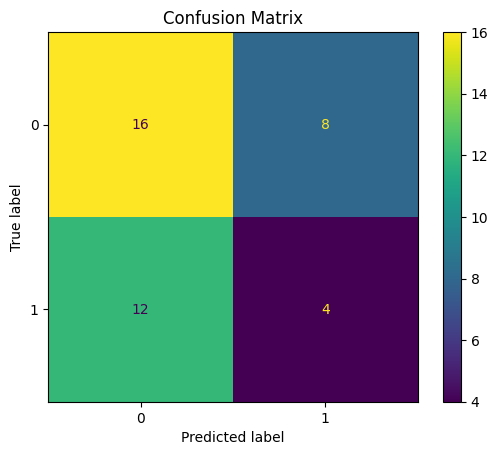

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        24
           1       0.33      0.25      0.29        16

    accuracy                           0.50        40
   macro avg       0.45      0.46      0.45        40
weighted avg       0.48      0.50      0.48        40



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_time = (best_model_time.predict(X_test_time) > 0.5).astype("int32")

# Calculate test accuracy
test_accuracy_time = accuracy_score(y_test_time, y_pred_time)
print(f"Test Accuracy: {test_accuracy_time * 100:.2f}%")

# Generate the confusion matrix
conf_matrix_time = confusion_matrix(y_test_time, y_pred_time)

# Plot the confusion matrix
ConfusionMatrixDisplay(conf_matrix_time).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report_time = classification_report(y_test_time, y_pred_time)
print("Classification Report:")
print(report_time)

# Frequency EEG Test Accuracy

Test Accuracy: 40.00%


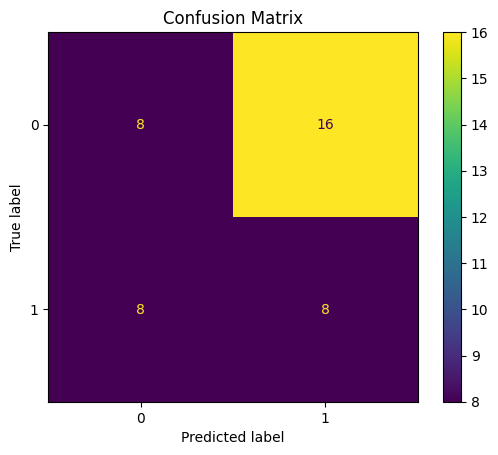

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        24
           1       0.33      0.50      0.40        16

    accuracy                           0.40        40
   macro avg       0.42      0.42      0.40        40
weighted avg       0.43      0.40      0.40        40



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


# Predict on the test set
y_pred_frequency = (best_model_frequency.predict(X_test_frequency) > 0.5).astype("int32")

# Calculate test accuracy
test_accuracy_frequency = accuracy_score(y_test_frequency, y_pred_frequency)
print(f"Test Accuracy: {test_accuracy_frequency * 100:.2f}%")

# Generate the confusion matrix
conf_matrix_frequency = confusion_matrix(y_test_frequency, y_pred_frequency)

# Plot the confusion matrix
ConfusionMatrixDisplay(conf_matrix_frequency).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report_frequency = classification_report(y_test_frequency, y_pred_frequency)
print("Classification Report:")
print(report_frequency)

# Combined EEG Test Accuracy


Test Accuracy: 52.50%


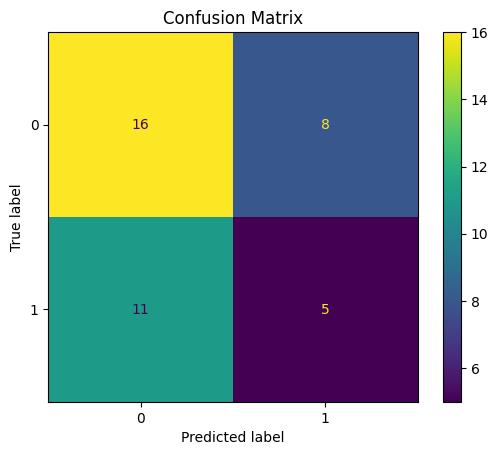

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.67      0.63        24
           1       0.38      0.31      0.34        16

    accuracy                           0.53        40
   macro avg       0.49      0.49      0.49        40
weighted avg       0.51      0.53      0.51        40



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_time_frequency = (best_model_time_frequency.predict(X_test_time_frequency) > 0.5).astype("int32")

# Calculate test accuracy
test_accuracy_time_frequency = accuracy_score(y_test_time_frequency, y_pred_time_frequency)
print(f"Test Accuracy: {test_accuracy_time_frequency * 100:.2f}%")

# Generate the confusion matrix
conf_matrix_time_frequency = confusion_matrix(y_test_time_frequency, y_pred_time_frequency)

# Plot the confusion matrix
ConfusionMatrixDisplay(conf_matrix_time_frequency).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report_time_frequency = classification_report(y_test_time_frequency, y_pred_time_frequency)
print("Classification Report:")
print(report_time_frequency)

# Important Position EEG Test Accuracy

Test Accuracy: 50.00%


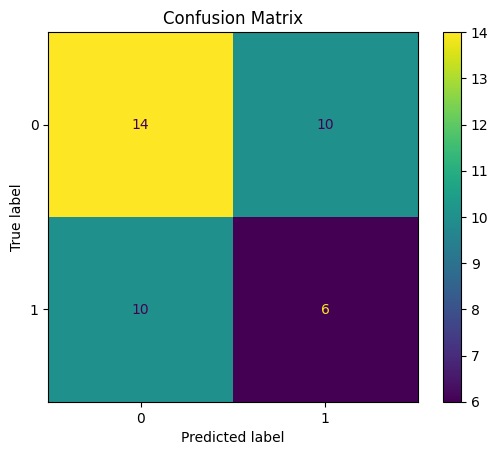

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        24
           1       0.38      0.38      0.38        16

    accuracy                           0.50        40
   macro avg       0.48      0.48      0.48        40
weighted avg       0.50      0.50      0.50        40



In [ ]:
# Predict on the test set
y_pred_important_positions = (best_model_important_positions.predict(X_test_important_positions) > 0.5).astype("int32")

# Calculate test accuracy
test_accuracy_important_positions = accuracy_score(y_test_important_positions, y_pred_important_positions)
print(f"Test Accuracy: {test_accuracy_important_positions * 100:.2f}%")

# Generate the confusion matrix
conf_matrix_important_positions = confusion_matrix(y_test_important_positions, y_pred_important_positions)

# Plot the confusion matrix
ConfusionMatrixDisplay(conf_matrix_important_positions).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report_important_positions = classification_report(y_test_important_positions, y_pred_important_positions)
print("Classification Report:")
print(report_important_positions)

# ROC curves

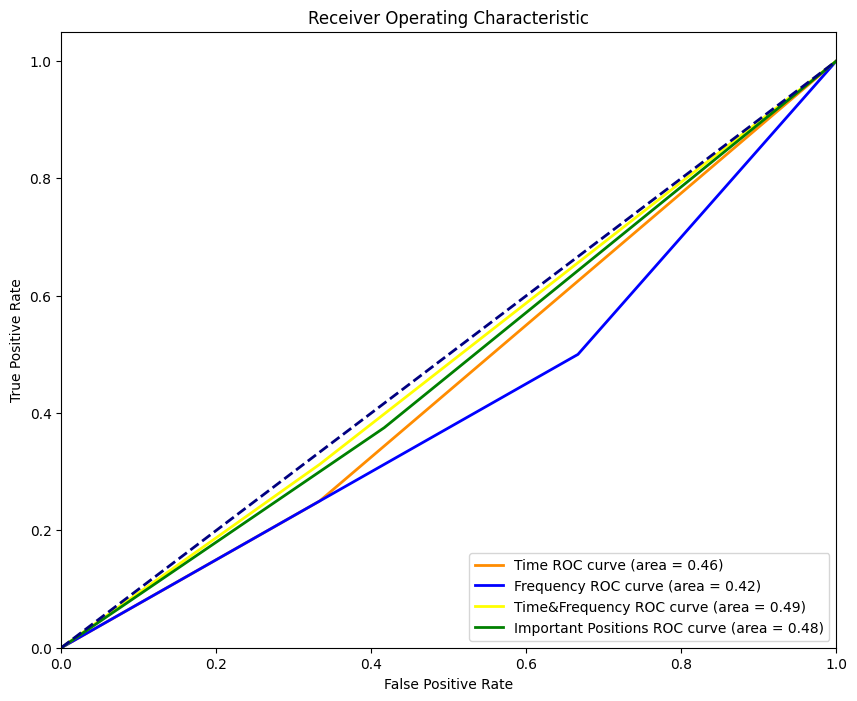

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class for all models
y_pred_probs_time = best_model_time.predict(X_test_time).ravel()
y_pred_probs_frequency = best_model_frequency.predict(X_test_frequency).ravel()
y_pred_probs_time_frequency = best_model_time_frequency.predict(X_test_time_frequency).ravel()
y_pred_probs_important_positions = best_model_important_positions.predict(X_test_important_positions).ravel()  # New model

# Compute the ROC curve for each model
fpr_time, tpr_time, thresholds_time = roc_curve(y_test_time, y_pred_probs_time)
roc_auc_time = auc(fpr_time, tpr_time)

fpr_frequency, tpr_frequency, thresholds_frequency = roc_curve(y_test_frequency, y_pred_probs_frequency)
roc_auc_frequency = auc(fpr_frequency, tpr_frequency)

fpr_time_frequency, tpr_time_frequency, thresholds_time_frequency = roc_curve(y_test_time_frequency, y_pred_probs_time_frequency)
roc_auc_time_frequency = auc(fpr_time_frequency, tpr_time_frequency)

fpr_important_positions, tpr_important_positions, thresholds_important_positions = roc_curve(y_test_important_positions, y_pred_probs_important_positions)  # New ROC computation
roc_auc_important_positions = auc(fpr_important_positions, tpr_important_positions)  # New AUC computation

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_time, tpr_time, color='darkorange', lw=2, label='Time ROC curve (area = %0.2f)' % roc_auc_time)
plt.plot(fpr_frequency, tpr_frequency, color='blue', lw=2, label='Frequency ROC curve (area = %0.2f)' % roc_auc_frequency)
plt.plot(fpr_time_frequency, tpr_time_frequency, color='yellow', lw=2, label='Time&Frequency ROC curve (area = %0.2f)' % roc_auc_time_frequency)
plt.plot(fpr_important_positions, tpr_important_positions, color='green', lw=2, label='Important Positions ROC curve (area = %0.2f)' % roc_auc_important_positions)  # New curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()